# HDip in Science in Data Analytics for Business (FT)

Module Title: Data Preparation

Assessment Title: CA1_DataPrep_HDip  

Lecturer Name: David McQuaid  

Student Full Name: Bárbara Abreu Costa

Student Number: 2023099

Assessment Due Date: Thursday, 20 April 2023

Date of Submission: Saturday, 15 20 April 2023

---------------------------------------------------------------------------------

## Scenario: 

You have been retained by a haulage company to analyse a dataset based on data collected from heavy *Scania trucks* in everyday usage. The system in focus is the *Air Pressure system (APS)* which generates pressurised air that are utilized in various functions in a truck, such as braking and gear changes. 

- The dataset’s  positive class consists of component failures for a specific component of the APS system.
- The negative class consists of trucks with failures for components not related to the APS. 

The data consists of a subset of all available data, selected by experts. This analysis will help determine the investment strategy for the company in the upcoming year.

All data wrangling, analysis, and visualizations must generated using python.

The companies CTO also requires you to rationalize all the decisions that you have made in your report.

--------------------------------

First of all we gonna import the libraries from Python to support our analysis and exploratory process

In [1]:
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline 
from sklearn.decomposition import PCA

Next we'll import the data that will be explored

In [2]:
data = pd.read_csv('aps_failure_set.csv')

## 1. Characterisation of the data set:

We then used two functions, namely "head" and "tail", to view the first and last five rows of the dataset. By doing so, we obtained a quick overview of the dataset, including the presence of any missing values.

In [3]:
data.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [4]:
data.tail(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


Analyzing these sections of the dataset, we can get a brief understanding of the dataset and identify any issues that need to be addressed during the data preparation phase - for exemple 'na' values present on columns 'ab_000' and	'ad_000'	

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


From the output above, we can see that the dateset is composed of 171 columns in total. 
One column is a integer type (Class) and 170 columns are object type.

In [6]:
data.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

Again we can check which types of variables are present in the dataset. By examining the data types of the variables, we can ensure that they are consistent with the intended use of the data and that they are compatible with the analysis techniques that we plan to use. This information can also help us identify any potential issues, such as columns with incorrect data types or missing values

In [7]:
data.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In this specific output, we can see that there are 171 columns in the data frame, and for each column, the number of missing values is zero. This means that there are no missing values in any column of the data frame. What is unreal, as we have see before there are 'na' values present on columns 'ab_000' and 'ad_000. 

Checking size of the dataset:

In [8]:
data.shape

(60000, 171)

This information is useful for understanding the size and shape of the dataset, where the first value (60000) represents the number of rows/observations, while the second value (171) represents the number of columns/features.

Providing summary statistics: 

In [9]:
data.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


Here we can see quantitative variables, the Central tendencies, the quantiles, the Standard deviation, and the count.

And now, below we see the qualitative variables, that shows the object that appears the most and the frequency with which it appears.

In [10]:
data.describe(include=object)

,class,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,30,2062,1887,334,419,155,618,2423,7880,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,na,0,na,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,46329,8752,14861,55543,55476,59133,58587,56181,46894,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794


Analizing the return above, we can see that the 'na' is the most frequently occurring value in two columns. So we will have to deal with that, cleaning the data.

"The problem of missing data is one of the most important challenges in data analysis, and it requires careful consideration and appropriate techniques for handling." - Peter Dalgaard, Introductory Statistics with R, Springer, 2002.

## 2. EDA - Exploratory Data Analysis

EDA provides a set of functions that aid in data analysis and processing. It helps to examine and compare data, generate hypotheses, and perform statistical testing. However, to get accurate and useful insights, it is necessary to clean and preprocess the data by removing outliers, handling missing values, and correcting assumptions. 

John W. Tukey, a pioneer in the field of exploratory data analysis, once said that "Exploratory data analysis is an attitude, a state of flexibility, a willingness to look for those things that we believe are not there, as well as those we believe are there." (Tukey, 1977)

### 2.1 - Cleaning

What we'll do now it's load the dataset into a new Data Frame and turn all missing values into a NaN.

In [11]:
df_new = pd.read_csv('aps_failure_set.csv', na_values=["n.a.","?","NA","n/a", "na", "--"])

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


Now our data chaged a bit, and it have 169 floats, one object, and one integer.

We can print the "head" again just to ensure the changes. As you can see below, all the missing values are now named as NaN

In [13]:
df_new.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


Also we have to check duplicate information

In [14]:
dup_rows_df = df_new[df_new.duplicated()] 
print("Number of duplicate rows:", dup_rows_df.shape)

Number of duplicate rows: (0, 171)


By using the code below, we can quickly check how many unique classes are present in the 'class' column and what are they.

In [15]:
df_new['class'].unique()

array(['neg', 'pos'], dtype=object)

The plot below provides a quick and easy way to visualize the distribution of values in the target variable 'Class' showing the amount or frequency with which each classification (negative or positive) appears.

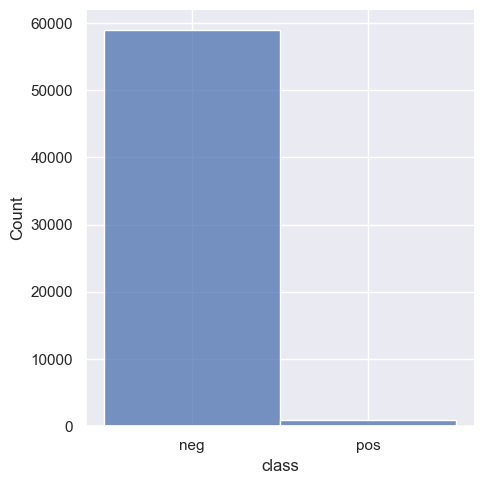

In [16]:
sns.displot(df_new["class"]);

Check the number of missing values in each column

In [17]:
df_new.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

Drop columns with a high number of missing values by setting the threshold to 70% and drop columns that have more than 30% missing values

In [18]:
df_new.dropna(thresh=len(df_new)*0.7, axis=1, inplace=True)

In [19]:
df_new.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


Instead 171 columns, now we have 161

As we still having NaN in our data, I'll impute missing values in remaining columns

In the code below, for each column it checks the datatype of the column. If the datatype is float64, it fills the missing values in that column with the mean value of that column using the fillna() function. If the datatype is not float64, it fills the missing values with the mode (most frequent value) of that column using the fillna() function.

In [20]:
for col in df_new.columns:
    if df_new[col].dtype == 'float64':
        df_new[col].fillna(df_new[col].mean(), inplace=True)
    else:
        df_new[col].fillna(df_new[col].mode()[0], inplace=True)

Drop rows with remaining missing values

In [21]:
df_new.dropna(inplace=True)

In [22]:
df_new.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [23]:
df_new.isnull().sum()

class     0
aa_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 161, dtype: int64

Our new data has now 161 columns and no missing values

In [24]:
df_new["class"].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

As we need to analyse the failures present in the APS system, only the values the positive values are relevant to this analysis. Thus, will be necessary to reduce the data excluding all the observations in the dataset that are negative value in the column “class”.

In [25]:
df_new.drop(df_new.loc[df_new['class']== "neg"].index, inplace=True)

In [26]:
df_new.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
9,pos,153204,1.820000e+02,190620.639314,0.00000,0.000000,0.0,0.0,0.0,11804.0,...,1.298620e+05,2.687200e+04,3.404400e+04,2.247200e+04,3.436200e+04,0.000000,0.000000,0.000000,0.000000,0.000000
23,pos,453236,2.926000e+03,190620.639314,0.00000,0.000000,0.0,0.0,222.0,323436.0,...,7.908038e+06,3.026002e+06,5.025350e+06,2.025766e+06,1.160638e+06,533834.000000,493800.000000,6914.000000,0.000000,0.000000
60,pos,72504,1.594000e+03,1052.000000,0.00000,0.000000,0.0,244.0,178226.0,1249396.0,...,1.432098e+06,3.722520e+05,5.275140e+05,3.582740e+05,3.328180e+05,284178.000000,3742.000000,0.000000,0.000000,0.000000
115,pos,762958,3.560143e+08,190620.639314,6.81913,11.006817,776.0,281128.0,2186308.0,8123016.0,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,346271.429824,138729.983179,8388.914629,0.090579,0.212756
135,pos,695994,3.560143e+08,190620.639314,6.81913,11.006817,0.0,0.0,0.0,55620.0,...,1.397742e+06,4.955440e+05,3.616460e+05,2.861000e+04,5.130000e+03,212.000000,0.000000,0.000000,0.090579,0.212756


Next step will be replaces all occurrences of the string value "pos" (Positive) with the integer value 1.

In [27]:
df_new.replace("pos", 1, inplace = True)

In [28]:
df_new["class"].value_counts()

1    1000
Name: class, dtype: int64

Now, we make sure there is no more any missing value and have only the relevant data to  analyse, we can start the PCA.

## 3. PCA (Principal Component Analysis)

Wold et al. (1987) state that PCA is a widely used method for dimensionality reduction and visualization of multivariate data. According to their study published in Chemometrics and Intelligent Laboratory Systems, PCA can be applied to a variety of fields for data analysis.

To begin the process of principal component analysis, we need to import the necessary libraries that will support accurate prediction of all variables.

In [29]:
from sklearn.preprocessing import StandardScaler

Next we define which columns will be our feature

In [30]:
feature = ["class"]

Then we separate out the features

In [31]:
x = df_new.loc[:, feature].values

The next code will standardizes the dataset 'x' by transforming it to have zero mean and unit variance using the StandardScaler transformer. 

In [32]:
x = StandardScaler().fit_transform(x)

In [33]:
print(x)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

Apply the Standardization is a important preprocessing step because PCA is sensitive to the scale of the input features. So  we can ensure that all variables have the same scale and contribute equally to the analysis. 

Standardization also transforms the variables to have a mean of zero and a standard deviation of one, which makes the interpretation of the principal components more straightforward.

In [34]:
scaler = StandardScaler()
scaler.fit(df_new)
df_new_2 = scaler.transform(df_new)

According to Cuesta (2013), "PCA is the most commonly used algorithm for dimensionality reduction. Its purpose is to identify a set of principal components that are linearly uncorrelated and capture the most important information in the data."

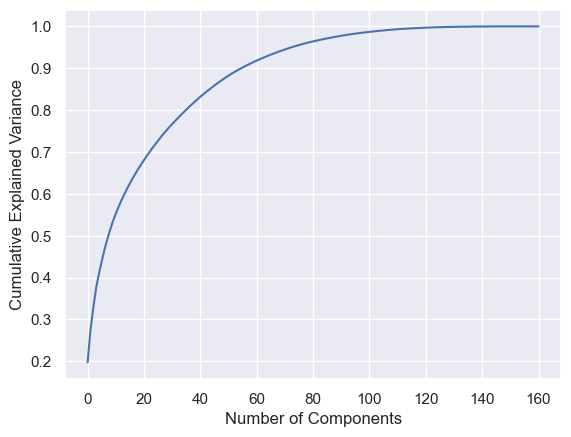

In [35]:
pca = PCA().fit(df_new_2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

The resulting plot provides information on how much of the total variance in the original dataset is explained by each of the principal components.

Next code will provide the minimum number of features to retain 99.5% of the variance in the original dataset

In [36]:
pca = PCA(0.995).fit(df_new_2)
pca.n_components_

116

Which means that to retain at least 99.5% of the variance in the dataset, 116 principal components are required.

In [37]:
pca = PCA(0.995)
projected = pca.fit_transform(df_new_2)

Above we fits the PCA model to the data and then transforms the data to the new lower-dimensional space.

In [38]:
projected.shape

(1000, 116)

The resulting projected array contains the transformed data with reduced dimensionality. The number of columns in projected is equal to the number of principal components required to retain at least 99.5% of the variance in the original dataset, as specified by the PCA instance pca.

In [39]:
from sklearn.decomposition import PCA 
pca = PCA(n_components= 1)

In [40]:
pca.fit(x)
np.round(pca.explained_variance_ratio_,1)

C:\Users\barba\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


array([nan])

In [41]:
pca = PCA(n_components=1 )
principalComponents = pca.fit_transform(x)
df_new_2 = pd.DataFrame(data = principalComponents, columns = ["class"])
df_new_2.tail()

C:\Users\barba\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


,class
995,0.0
996,0.0
997,0.0
998,0.0
999,0.0


In [42]:
pca = PCA(n_components=1)
pca.fit(x)
x_pca = pca.transform(x)
print("Original shape: ", x.shape)
print("Transformed shape:", x_pca.shape)

Original shape:  (1000, 1)
Transformed shape: (1000, 1)


C:\Users\barba\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


In sum, what we have done by using PCA was to reduce the number of variables in the dataset while preserving as much information as possible. According to Aurelien Geron's book "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, Second Edition", PCA is a technique that can transform high-dimensional data into a lower-dimensional space, preserving the most important information. By doing so, it can help to avoid the curse of dimensionality and improve the efficiency and interpretability of machine learning models.

This allows for more efficient and effective analysis, as we can focus on the most important variables and avoid issues related to high dimensionality.



## 3. Explain in your own words what the “Curse of Dimensionality ” is. 

The Curse of Dimensionality is a phenomenon that refers to the difficulty of analyzing and modeling high-dimensional datasets (as is the case with the dataset in question) due to the exponential increase in the number of possible configurations as the number of dimensions increases, which can result in sparse data and make it challenging to identify patterns and relationships among the variables.This can lead to overfitting and poor generalization, as models can become too complex to accurately capture the underlying structure of the data.




## 4. Conclusions and findings of data set

In this dataset, there were several issues such as class imbalance followed by missing values. The choice of an appropriate performance metric was a difficult decision factor.

That said, the first task was to perform a detailed EDA to identify where the greatest value of missing values were and their distribution.

We then remove the features that have the maximum amount of missing values (70%) and then impute the rest of the missing values using a combination of the Mean and Mode methods.

We then passed this preprocessed dataset through our PCA technique, which gave us the result of retaining 116 principal components to explain at least 99.5% of the variation in the dataset.

This means that the original dataset has a high dimensionality and requires a significant number of principal components to accurately capture the variability within the data.

However, it also suggests that there might be some redundancy or noise in the dataset that could be removed through other feature selection techniques or dimensionality reduction. Retaining a large number of core components can also have computational or memory limitations, so it's important to balance the amount of variation retained with practical considerations for the specific analysis or application.

------------------------------------------------------------------

## REFERENCES

- Van Rossum, G. (2001). Python Programming Language. Network Theory Ltd.
- Python Software Foundation. (2021). Python Language Reference. Python.org. https://docs.python.org/3/reference/
- Mendes, D. (2023). Python Language Fundamentals for Data Analysis and Data Science. Data Science Academy. https://www.datascienceacademy.com.br/
- DeGroot, M. H., & Schervish, M. J. (2011). Probability and Statistics (4th ed.). Pearson.
- Wold, S., Esbensen, K., & Geladi, P. (1987) 'Principal component analysis', Chemometrics and Intelligent Laboratory Systems, 2(1-3), pp. 37-52.
- Cuesta, Hector. Practical Data Analysis : Transform, Model, and Visualize Your Data through Hands-on Projects, Developed in Open Source Tools. Birmingham, Uk, Packt, Oct. 2013, p. 141.
- Team, G.L. (2020). What is Curse of Dimensionality in Machine Learning? [online] GreatLearning Blog: Free Resources what Matters to shape your Career! Available at: https://www.mygreatlearning.com/blog/understanding-curse-of-dimensionality/.
- Shetty, R. (2021). Predicting a Failure in Scania’s Air Pressure System (APS). [online] Medium. Available at: https://towardsdatascience.com/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4d038.
- ResearchGate. (n.d.). (PDF) Prediction of Failures in the Air Pressure System of Scania Trucks Using a Random Forest and Feature Engineering. [online] Available at: https://www.researchgate.net/publication/309195602_Prediction_of_Failures_in_the_Air_Pressure_System_of_Scania_Trucks_Using_a_Random_Forest_and_Feature_Engineering.